# 1. 조건에 맞는 데이터만 남기기

## (1)건강기능식품 데이터 9,931 장 선별

In [ ]:
# 건강기능식품 annotation 데이터만 남기기
df = {'file_name' : [], 'text' : []}
file_list = os.listdir(r'medicine\annotations')
base_path = r'056.의약품, 화장품 패키징 OCR 데이터\01.데이터\1. Training\라벨링데이터\TL1\result\medicine\annotations'

count = 0

for file in file_list:
    file = os.path.join(base_path, file)
    data = pd.read_json(file)
    data = data.iloc[0]

    if data["images"]['product_category'] !='의약품_건강기능식품':
        os.remove(file)
        
        print(file)     
    

In [20]:
# 건강기능식품 이미지만 남기기
import shutil
import pandas as pd

base_path = '56.의약품, 화장품 패키징 OCR 데이터/01.데이터/1. Training/라벨링데이터/TL1/result/medicine/annotations'

src = '056.의약품, 화장품 패키징 OCR 데이터/01.데이터/1. Training/원천데이터/TS1/result/medicine/images/'
destination = '056.의약품, 화장품 패키징 OCR 데이터/01.데이터/1. Training/원천데이터/TS1/result/medicine/health_images/'

for file in os.listdir(base_path):
    file = os.path.join(base_path, file)

    data = pd.read_json(file)
    data = data.iloc[0]

    image_name = data['images']['name']
    shutil.move(src + image_name, destination + image_name)

    print(image_name,"이동완료")
    

medicine_31215.jpg 이동완료
medicine_31216.jpg 이동완료
medicine_31218.jpg 이동완료
medicine_31219.jpg 이동완료
medicine_31220.jpeg 이동완료
medicine_31221.jpeg 이동완료
medicine_31222.jpeg 이동완료
medicine_31223.jpg 이동완료
medicine_31224.jpg 이동완료
medicine_31225.jpg 이동완료
medicine_31226.jpg 이동완료
medicine_31227.jpg 이동완료
medicine_31228.jpg 이동완료
medicine_31229.jpg 이동완료
medicine_31230.jpg 이동완료
medicine_31231.jpeg 이동완료
medicine_31233.jpg 이동완료
medicine_31234.jpg 이동완료
medicine_31235.jpg 이동완료
medicine_31236.jpg 이동완료
medicine_31237.jpg 이동완료
medicine_31238.jpg 이동완료
medicine_31239.jpg 이동완료
medicine_31240.jpg 이동완료
medicine_31241.jpeg 이동완료
medicine_31242.jpeg 이동완료
medicine_31243.jpeg 이동완료
medicine_31244.jpeg 이동완료
medicine_31245.jpeg 이동완료
medicine_31246.jpeg 이동완료
medicine_31247.jpg 이동완료
medicine_31249.jpg 이동완료
medicine_31250.jpg 이동완료
medicine_31251.jpeg 이동완료
medicine_31252.jpeg 이동완료
medicine_31253.jpeg 이동완료
medicine_31255.jpeg 이동완료
medicine_31256.jpeg 이동완료
medicine_31258.jpeg 이동완료
medicine_31259.jpg 이동완료
medicine_31260.jpg 이동완료


## (2)육안으로 이상치 제거 및 약 1,000장의 이미지 선별


In [ ]:
# 이미지 회전되서 찍은 사람의 이미지 모두 삭제-> BBOX CROP시 잘못 잘리게 됨.따라서 삭제 필요했음.
import os
import pandas as pd

anno_path = r'trocr\056.의약품, 화장품 패키징 OCR 데이터\01.데이터\1. Training\라벨링데이터\TL1\result\medicine\annotations'
img_path = r"trocr\056.의약품, 화장품 패키징 OCR 데이터\01.데이터\1. Training\원천데이터\TS1\result\medicine\images"

cnt = 0
for file in os.listdir(anno_path ):
    
    file = os.path.join(anno_path , file)

    data = pd.read_json(file)
    data = data.iloc[0]

    if data['images']["writer_num"] == "gimmeye00@hanmai.net" :
        img_file = os.path.join(img_path, data['images']['name'])
        print(file)
        print(img_file)
        # draw_bbox_for_one_image( anno_path ,img_path ,data['images']['name']) 
        
        os.remove(file)
        os.remove(img_file)
        cnt += 1

print(cnt)


In [ ]:
# 위 코드 data_ver1 폴더에서도 실행해서 제거함.
anno_path = r'data_ver1\annotations'
img_path = r"data_ver1\images"

cnt = 0
for file in os.listdir(anno_path ):
    
    file = os.path.join(anno_path , file)

    data = pd.read_json(file)
    data = data.iloc[0]

    if data['images']["writer_num"] == "gimmeye00@hanmai.net" :
        img_file = os.path.join(img_path, data['images']['name'])
        print(file)
        print(img_file)
        # draw_bbox_for_one_image( anno_path ,img_path ,data['images']['name']) 
        
        os.remove(file)
        os.remove(img_file)
        cnt += 1

print(cnt)


* 이미지 위에 bbox 찍어보기(PIL 라이브러리 활용, CV2 아님.)

In [ ]:
################## 이미지 한개만 bbox 그려보는 코드 #######################################
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import ImageDraw, ImageFont, Image


def draw_bbox_for_one_image(label_path, image_path, file):



    anno_file = os.path.join(label_path, file.split('.')[0] + ".json")

    data = pd.read_json(anno_file)
    data = data.iloc[0]

    image_name = data['images']['name']
    img = Image.open(os.path.join(image_path,file)).convert('RGB')

    for bbox in data['annotations']['bbox']:
    
        x1, y1 = bbox['x'], bbox['y']
        x2, y2 = bbox['x']+bbox['width'], bbox['y']+bbox['height']

        draw = ImageDraw.Draw(img)
        draw.rectangle([(x1, y1), (x2, y2)], outline='red', width=5)
        
    img.show()

draw_bbox_for_one_image( 'data_ver1/annotations', 'data_ver1/images',"medicine_31396.jpg")

In [84]:
################## 특정 폴더에 있는 이미지 모두 BBOX 그려보기 ############################
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import ImageDraw, ImageFont, Image
import os

base_path = '056.의약품, 화장품 패키징 OCR 데이터/01.데이터/1. Training/라벨링데이터/TL1/result/medicine/annotations'

src_path = '056.의약품, 화장품 패키징 OCR 데이터/01.데이터/1. Training/원천데이터/TS1/result/medicine/images/'

for file in os.listdir(base_path):
    anno_file = os.path.join(base_path, file)

    data = pd.read_json(anno_file)
    data = data.iloc[0]

    image_name = data['images']['name']
    img = Image.open(os.path.join(src_path, image_name)).convert('RGB')
    
    for bbox in data['annotations']['bbox']:
       
        x1, y1 = bbox['x'], bbox['y']
        x2, y2 = bbox['x']+bbox['width'], bbox['y']+bbox['height']
    
        draw = ImageDraw.Draw(img)
        draw.rectangle([(x1, y1), (x2, y2)], outline='red', width=5)
        
        
    img.show()
    

## (3) data_ver1(세로로 적힌 글자, 한자 삭제)에서 bbox 데이터셋 정리
    - BBOX의 폭, 높이, 텍스트 길이 0 값 제거

In [2]:
import json
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import os

def read_json(base_path, file) :
    file = os.path.join(base_path, file)

    with open(file,encoding='UTF-8' ) as f:
        data = json.load(f)
    
    return data


anno_path = "data_ver1/annotations"
img_path = "data_ver1/images"
li = []
dic = {'original_img_name':[],'text':[], "polygons": [], 'bbox':[], 'bbox 높이에 대한 너비 비':[], "문자길이에 대한 종횡비":[]}

for file in os.listdir('data_ver1/annotations'):

    data = read_json(anno_path,file)
    for i, j in zip(data['annotations'][0]['polygons'], data['annotations'][0]["bbox"]):
        # bbox 데이터 삭제 조건
        if j['height'] == 0 or j['width'] == 0 : # bbox의 width , height 0인 값 삭제 
            continue
        elif len(i['text']) == 0 : # text 길이 0인 경우 삭제
            continue
        # elif :

        dic['original_img_name'].append(data['name'])
        dic['text'].append(i['text'])
        dic['polygons'].append(i['points'])
        dic['bbox'].append([j['x'],j['y'],j['width'],j['height']])

        
        dic['bbox 높이에 대한 너비 비'].append(j['width']/j['height'])
        dic['문자길이에 대한 종횡비'].append((j['width']/j['height'])/len(i['text'])) # 무슨 의미인지 모르겠다. 
        
df = pd.DataFrame(dic)
df['text_length'] = df['text'].apply(len)
df


,original_img_name,text,polygons,bbox,bbox 높이에 대한 너비 비,문자길이에 대한 종횡비,text_length
0,medicine_31215.jpg,건강,"[[270.7996407778658, 181.6060866848643], [356....","[270.7996407778658, 181.6060866848643, 85.8899...",1.729167,0.864583,2
1,medicine_31215.jpg,기능식품,"[[231.2671741729349, 237.28789101405005], [395...","[231.2671741729349, 237.28789101405005, 163.89...",3.250000,0.812500,4
2,medicine_31215.jpg,MADE,"[[2087.3517247825835, 176.46746671166335], [23...","[2084.202921282695, 176.46746671166335, 243.71...",3.909091,0.977273,4
3,medicine_31215.jpg,IN,"[[2336.7369619737538, 183.39483441141803], [24...","[2334.8476798738207, 183.39483441141803, 98.24...",1.677419,0.838710,2
4,medicine_31215.jpg,USA,"[[2447.5748451698287, 185.91387721132884], [25...","[2444.426041669941, 185.91387721132884, 150.51...",2.366337,0.788779,3
...,...,...,...,...,...,...,...
106915,medicine_32820.jpg,유통기한,"[[109.49328779974199, 3030.854831940932], [447...","[109.49328779974199, 3030.854831940932, 337.68...",2.941489,0.735372,4
106916,medicine_32820.jpg,나트륨,"[[1288.428836456075, 906.5898020406504], [1564...","[1288.428836456075, 906.5898020406504, 276.353...",2.428571,0.809524,3
106917,medicine_32820.jpg,"25㎍(1,000","[[1039.4533106824476, 1025.3530132751105], [15...","[1039.4533106824476, 1015.1929759969929, 528.3...",4.055687,0.450632,9
106918,medicine_32820.jpg,까지,"[[1454.7196189009367, 3137.17276339905], [1454...","[1454.0794263845135, 3021.2979179264426, 182.4...",1.565934,0.782967,2


In [17]:
df[df['original_img_name'] == 'medicine_32820.jpg']

,original_img_name,text,polygons,bbox,bbox 높이에 대한 너비 비,문자길이에 대한 종횡비,text_length
106816,medicine_32820.jpg,영양,"[[592.8014993472779, 185.16209318860896], [755...","[592.8014993472779, 185.16209318860896, 162.42...",1.518797,0.759398,2
106817,medicine_32820.jpg,·,"[[765.6778748194862, 227.77812993292076], [780...","[765.6778748194862, 227.77812993292076, 15.277...",0.791667,0.791667,1
106818,medicine_32820.jpg,기능정보,"[[793.8205405940317, 186.770245518583], [1120....","[793.8205405940317, 185.966169353596, 326.4549...",3.052632,0.763158,4
106819,medicine_32820.jpg,[비타민D],"[[165.83705573917265, 319.4428127414405], [509...","[165.83705573917265, 316.22650808149245, 345.7...",3.115942,0.519324,6
106820,medicine_32820.jpg,1,"[[563.8547574077451, 336.3284122061678], [594....","[563.8547574077451, 336.3284122061678, 30.5548...",0.431818,0.431818,1
...,...,...,...,...,...,...,...
106915,medicine_32820.jpg,유통기한,"[[109.49328779974199, 3030.854831940932], [447...","[109.49328779974199, 3030.854831940932, 337.68...",2.941489,0.735372,4
106916,medicine_32820.jpg,나트륨,"[[1288.428836456075, 906.5898020406504], [1564...","[1288.428836456075, 906.5898020406504, 276.353...",2.428571,0.809524,3
106917,medicine_32820.jpg,"25㎍(1,000","[[1039.4533106824476, 1025.3530132751105], [15...","[1039.4533106824476, 1015.1929759969929, 528.3...",4.055687,0.450632,9
106918,medicine_32820.jpg,까지,"[[1454.7196189009367, 3137.17276339905], [1454...","[1454.0794263845135, 3021.2979179264426, 182.4...",1.565934,0.782967,2


## (4) 데이터 EDA
- 최종 10만장에 대해 종횡비 히스토그램으로 알아보기

In [32]:
print(max(df['bbox 높이에 대한 너비 비']), min(df['bbox 높이에 대한 너비 비']))

20.228571428571435 0.07368421052631552


In [88]:
df[df['bbox 높이에 대한 너비 비'] == max(df['bbox 높이에 대한 너비 비'])]
draw_bbox_for_one_image("medicine_31429.jpg")

In [94]:
df[df['bbox 높이에 대한 너비 비'] == min(df['bbox 높이에 대한 너비 비'])]
draw_bbox_for_one_image("medicine_32092.jpg")

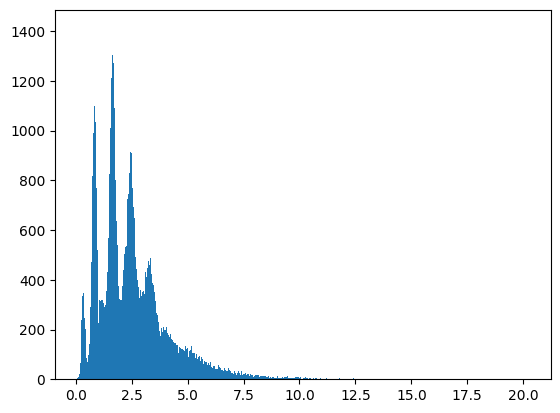

In [5]:
plt.hist(df['bbox 높이에 대한 너비 비'],bins= 1000)
plt.show()

- 데이터가 정규분포 따르는지 확인하기

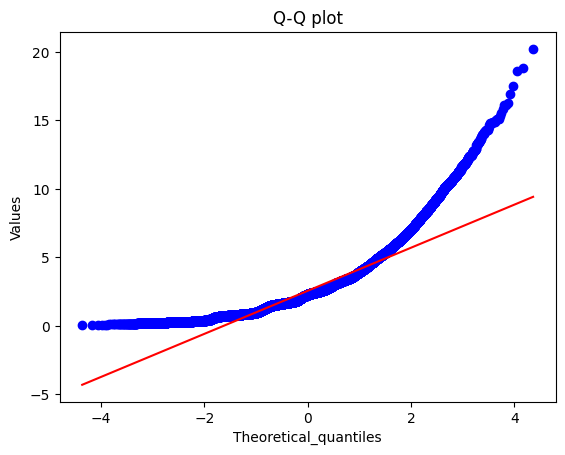

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# 정규분포 난수 생성
data = np.random.normal(loc=0, scale=1, size=1000)

# Q-Q 플롯 그리기
stats.probplot(df['bbox 높이에 대한 너비 비'], dist="norm", plot=plt)
plt.title('Q-Q plot')
plt.xlabel('Theoretical_quantiles')
plt.ylabel('Values')
plt.show()

- 정규분포 따르지 않는다고 판단하여, 사분위수 방법으로 추후 이상치 제거 예정.

In [28]:
df['bbox 높이에 대한 너비 비'].value_counts()

bbox 높이에 대한 가로 비
1.000000    81
2.000000    31
1.666667    20
1.500000    19
2.500000    19
            ..
3.646341     1
3.641975     1
3.493976     1
3.301205     1
0.423546     1
Name: count, Length: 101364, dtype: int64

In [ ]:

df_test = df[df['bbox 높이에 대한 너비 비'] > 10]
df_test['text'].unique()
for i in df_test['original_img_name']:   
    draw_bbox_for_one_image(i)
    print(i)

- text 길이 최대값도 알아보기

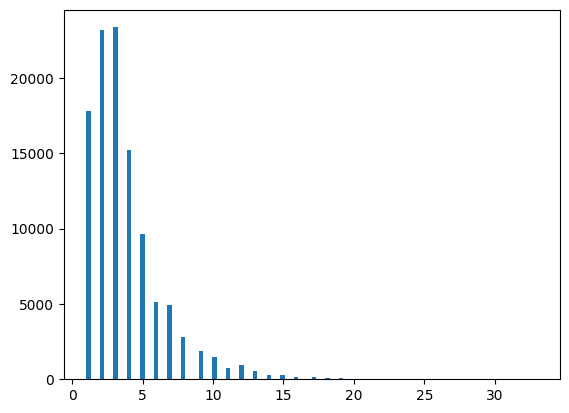

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 33]

In [26]:
plt.hist(df['text_length'],bins=100)
plt.show()
array = df['text_length'].unique()
sorted(array)

In [18]:
df[df['text_length'] == 33]

,original_img_name,text,polygons,bbox,bbox 높이에 대한 가로 비,문자길이에 대한 종횡비,text_length
55531,medicine_32162.jpg,12종혼합유산균(국내산/우유함유/Bifidobacterium,"[[576.1927022533242, 661.9881117072601], [576....","[576.1927022533242, 583.1829265160661, 1269.83...",16.113636,0.488292,33


In [17]:
img = df[df['text_length'] == 33].iloc[0]

draw_bbox_for_one_image(img['original_img_name'])

In [19]:
img = df[df['bbox 높이에 대한 너비 비'] == max(df['bbox 높이에 대한 너비 비'])].iloc[0]

draw_bbox_for_one_image(img['original_img_name'])

In [34]:
df[df['bbox 높이에 대한 너비 비'] == max(df['bbox 높이에 대한 너비 비'])]

,original_img_name,text,polygons,bbox,bbox 높이에 대한 너비 비,문자길이에 대한 종횡비
15162,medicine_31429.jpg,"아셀렌산나트륨혼합제제분말(아셀렌산나트륨,말토덱스트린),","[[801.5104300042835, 290.5191878823862], [801....","[801.5104300042835, 207.23815991723757, 1684.6...",20.228571,0.674286


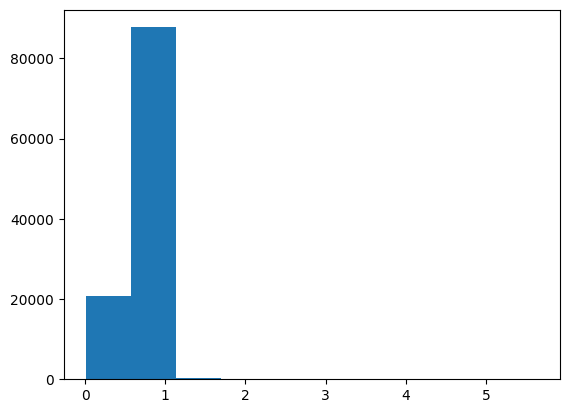

In [96]:
plt.hist(df["문자길이에 대한 종횡비"])
plt.show()

- 글자 수와 종횡비의 상관관계 확인하기

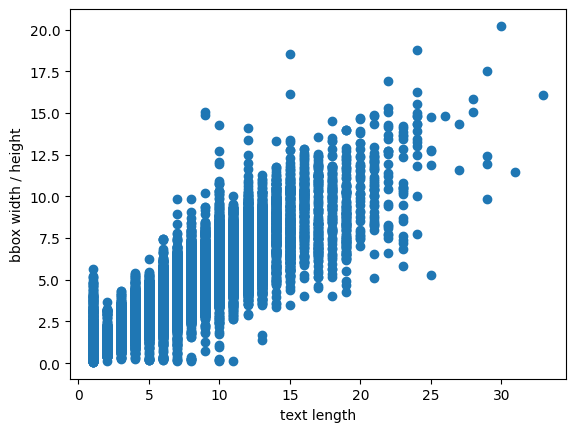

In [21]:
plt.scatter(df['text_length'], df["bbox 높이에 대한 너비 비"])
plt.xlabel("text length") #x축 이름 설정
plt.ylabel('bbox width / height')
plt.show()

## (5) 사분위수 방법 이용 이상치 제거

In [7]:
def outlier_iqr(data, column): 

    # lower, upper 글로벌 변수 선언하기     
    global lower, upper    
    
    # 4분위수 기준 지정하기     
    q25, q75 = np.quantile(data[column], 0.25), np.quantile(data[column], 0.75)   
    print('q25는', q25)
    print('q75는', q75)       
    
    # IQR 계산하기     
    iqr = q75 - q25    
    
    # outlier cutoff 계산하기     
    cut_off = iqr * 1.5          
    
    # lower와 upper bound 값 구하기     
    lower, upper = q25 - cut_off, q75 + cut_off     
    
    print('IQR은',iqr, '이다.')     
    print('lower bound 값은', lower, '이다.')     
    print('upper bound 값은', upper, '이다.')    
    
    # 1사 분위와 4사 분위에 속해있는 데이터 각각 저장하기     
    data1 = data[data[column] > upper]     
    data2 = data[data[column] < lower]    
    
    # 이상치 총 개수 구하기
    return print('총 이상치 개수는', data1.shape[0] + data2.shape[0], '이다.')

In [8]:
outlier_iqr(df,'bbox 높이에 대한 너비 비')

q25는 1.4999999999999987
q75는 3.2815533980582514
IQR은 1.7815533980582527 이다.
lower bound 값은 -1.1723300970873805 이다.
upper bound 값은 5.9538834951456305 이다.
총 이상치 개수는 4783 이다.


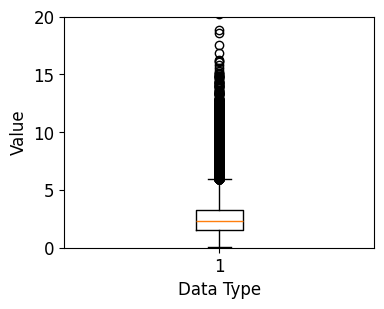

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# 1. 기본 스타일 설정
plt.style.use('default')
plt.rcParams['figure.figsize'] = (4, 3)
plt.rcParams['font.size'] = 12


fig, ax = plt.subplots()

ax.boxplot(df['bbox 높이에 대한 너비 비'])
ax.set_ylim(0, 20.0)
ax.set_xlabel('Data Type')
ax.set_ylabel('Value')

plt.show()

C:\Users\uniuj\AppData\Local\Temp\ipykernel_14468\2858448706.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bbox 높이에 대한 너비 비'], kde=False)


c:\Users\uniuj\anaconda3\envs\py39_trocr\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 45458 (\N{HANGUL SYLLABLE NOP}) missing from current font.
  func(*args, **kwargs)
c:\Users\uniuj\anaconda3\envs\py39_trocr\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  func(*args, **kwargs)
c:\Users\uniuj\anaconda3\envs\py39_trocr\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 50640 (\N{HANGUL SYLLABLE E}) missing from current font.
  func(*args, **kwargs)
c:\Users\uniuj\anaconda3\envs\py39_trocr\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  func(*args, **kwargs)
c:\Users\uniuj\anaconda3\envs\py39_trocr\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 54620 (\N{HANGUL SYLLABLE HAN}) missing from current font.
  func(*args, **kwargs)
c:\Users\uniuj\anaconda3\envs\py39_trocr\lib\site-packages\IPyth

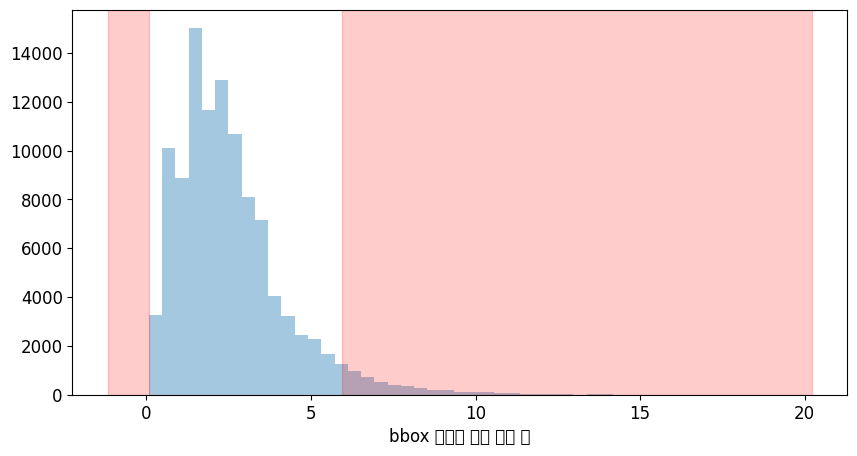

In [12]:
import seaborn as sns

plt.figure(figsize=(10,5))

sns.distplot(df['bbox 높이에 대한 너비 비'], kde=False)


# 이상치 영역 박스 그리기

plt.axvspan(xmin=lower, xmax=df['bbox 높이에 대한 너비 비'].min(), alpha=0.2, color='red')
plt.axvspan(xmin=upper, xmax=df['bbox 높이에 대한 너비 비'].max(), alpha=0.2, color='red')

In [ ]:
import json
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import os

def read_json(base_path, file) :
    file = os.path.join(base_path, file)
    with open(file) as f:
        data = json.load(f)
    return data

upper_bound = 5.9538834951456305
anno_path = "data_ver1/annotations"
img_path = "data_ver1/images"
li = []
dic = {'original_img_name':[],'text':[], 'bbox':[], 'bbox 높이에 대한 너비 비':[]}

for file in os.listdir('data_ver1/annotations'):

    data = read_json(anno_path,file)
    for i, j in zip(data['annotations'][0]['polygons'], data['annotations'][0]["bbox"]):
        # bbox 데이터 삭제 조건
        if j['height'] == 0 or j['width'] == 0 : # bbox의 width , height 0인 값 삭제 
            continue
        if j['width']/j['height'] > upper_bound : #사분위수 방법에 따른 이상치 제거
            continue
        elif len(i['text']) == 0 : # text 길이 0인 경우 삭제
            continue

        dic['original_img_name'].append(data['name'])
        dic['text'].append(i['text'])
        dic['bbox'].append([j['x'],j['y'],j['width'],j['height']])

        
        dic['bbox 높이에 대한 너비 비'].append(j['width']/j['height'])
        
df = pd.DataFrame(dic)
df['text_length'] = df['text'].apply(len)

## (6) 이미지 bbox에 맞게 자르기

In [ ]:
from PIL import Image
from tqdm import tqdm as tq

def crop_image(image_path, bbox):
    image = Image.open(image_path)
    croppedImage = image.crop((bbox[0],bbox[1], bbox[0]+bbox[2],bbox[1]+bbox[3])) #crop(left,up, rigth, down)
    croppedImage = croppedImage.convert("L") # 흑백 처리

    return croppedImage


In [ ]:
cnt = 0 
img_size = []


i = df.iloc[0]
img_n = i['original_img_name']
img = i['original_img_name']
bbox = i['bbox']
image_path = "data_ver1/images/" + img
img_name = img.split('.')[0]
img = crop_image(image_path, bbox)
img_size.append([img.size[0],img.size[1]])  


img.save('data_ver1/croppedimages/{0}_{1}.jpg'.format(img_name,cnt)) 
i['file_name'] = '{0}_{1}.jpg'.format(img_name,cnt)

with open('cropped_image.csv', 'a', newline='') as f:
        pd.DataFrame(i).T.to_csv(f, header=True, index=False, sep=',')

df_new = df.drop([0]).copy()

for i in tq(df_new.iloc) :
    img_new = i['original_img_name']
    if img_n != img_new :
        cnt = 0
        img_n = img_new
        img = img_new
        bbox = i['bbox']
        image_path = "data_ver1/images/" + img
        img_name = img.split('.')[0]
        img = crop_image(image_path, bbox)
        img_size.append([img.size[0],img.size[1]])     


        img.save('data_ver1/croppedimages/{0}_{1}.jpg'.format(img_name,cnt)) 
        i['file_name'] = '{0}_{1}.jpg'.format(img_name,cnt)

        with open('cropped_image.csv', 'a', newline='') as f:
            pd.DataFrame(i).T.to_csv(f, header=False, index=False, sep=',')
    else : 
        cnt += 1
        img_n = img_new
        img = img_new
        bbox = i['bbox']
        image_path = "data_ver1/images/" + img
        img_name = img.split('.')[0]
        img = crop_image(image_path, bbox)
        img_size.append([img.size[0],img.size[1]])     

        img.save('data_ver1/croppedimages/{0}_{1}.jpg'.format(img_name,cnt)) 
        i['file_name'] = '{0}_{1}.jpg'.format(img_name,cnt)

        with open('cropped_image.csv', 'a', newline='') as f:
            pd.DataFrame(i).T.to_csv(f, header=False, index=False, sep=',')

## 결과 : Crop 이미지 10만장, Annotation csv 파일 구축